<a href="https://colab.research.google.com/github/Radvian/pca-fashion-mnist/blob/main/PCA_Fashion_Mnist_Grady.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA on Fashion MNIST Dataset

### Part 1 : Importing Libraries and Dataset

Pada langkah ini, kita import beberapa libraries yang akan digunakan beserta dataset ```fashion-mnist```.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import time

import tensorflow as tf
from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

Agar lebih mengenal dataset ini, mari kita lihat shape dari masing-masing komponen.

In [3]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


Detil dari dataset ini dapat dilihat pada dokumentasi https://keras.io/api/datasets/fashion_mnist/. Berdasarkan paparan di atas, data training kita adalah sebanyak 60 000 dan berisi gambar berukuran 28x28 pixel. 

Setiap pixel nilainya adalah 0 sampai 255, seperti yang dijelaskan Pak Arko di kelas minggu lalu. Oleh sebab itu, dengan kata lain, dataset kita memiliki 28*28 = 784 'feature columns'. 

Mari kita lihat beberapa contoh dari dataset ini.

Label dari gambar ini adalah: 9


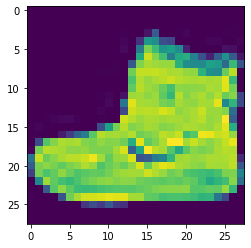

In [4]:
plt.imshow(x_train[0])
print('Label dari gambar ini adalah:', y_train[0])

Label dari gambar ini adalah: 5


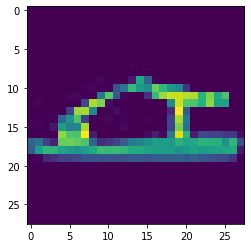

In [5]:
plt.imshow(x_train[120])
print('Label dari gambar ini adalah:', y_train[120])

Seperti yang terkandung dalam namanya, dataset ini berisi gambar 'fashion images' dan memiliki label 0 sampai 9. Apabila kita membaca dokumentasi dengan baik, maka kita mengetahui bahwa label-label nomor tersebut adalah sebagai berikut.

- Label 0: T-Shirt (Kaos)
- Label 1: Trouser (Celana Panjang)
- Label 2: Pullover (Kaos Lengan Panjang)
- Label 3: Dress (Gaun)
- Label 4: Coat (Jaket, Sweater, dll)
- Label 5: Sandal
- Label 6: Shirt (Kemeja)
- Label 7: Sneaker (Sepatu)
- Label 8: Bag (Tas)
- Label 9: Ankle Boot (Sepatu Boots)

In [6]:
dictionary = {0:'T-Shirt', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt',
              7:'Sneaker', 8:'Bag', 9:'Boots'}

In [7]:
x_train_flat = x_train.reshape(60000,784)
x_test_flat = x_test.reshape(10000,784)

### Part 2 : Decision Tree using Non-PCA Data

Mari kita terlebih dahulu memeriksa seberapa akurat dan seberapa lama waktu yang digunakan untuk melatih algoritma decision tree pada dataset kita sebelum dilakukan PCA.

Sebelumnya, saya telah melakukan regresi logistik, namun tidak kunjung konvergen.

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def dectree(x_train, y_train, x_test, y_test, return_pred = False):
  dt = DecisionTreeClassifier()
  start = time.time()
  dt.fit(x_train, y_train)
  end = time.time()

  duration = end-start
  accuracy = accuracy_score(y_test, dt.predict(x_test))

  if return_pred == False:
    return duration, accuracy
  else:
    return duration, accuracy, dt.predict(x_test)

In [9]:
duration_raw, accuracy_raw = dectree(x_train_flat, y_train,
                                    x_test_flat, y_test)

In [10]:
print('Time elapsed:', duration_raw, 'seconds.')
print('Model accuracy:', accuracy_raw, 'percent.')

Time elapsed: 60.015379428863525 seconds.
Model accuracy: 0.7901 percent.


### Part 2 : PCA with 95% Explained Variance

Setiap model machine learning berupaya untuk menjelaskan 'variance' dari dataset. Variance dalam hal ini diartikan sebagai seberapa 'bervariasi'/'berubah'nya dataset. Secara intuisi, 'variance' ini adalah 'informasi' dari dataset tersebut.

PCA mengupayakan agar kita mereduksi dimensi dari dataset, namun masih mempertahankan 'variance' dari dataset tersebut. Kita ingin mereduksi dataset kita namun masih mempertahankan sebanyak mungkin 'informasi' semula.

Berapa bagian (biasanya dalam persen) dari 'informasi' yang ingin dipertahankan disebut 'explained variance'.

In [11]:
from sklearn.decomposition import PCA

pca_95 = PCA(0.95)

In [12]:
start_time = time.time()
pca_95.fit(x_train_flat)
x_train_pca_95 = pca_95.transform(x_train_flat)
x_test_pca_95 = pca_95.transform(x_test_flat)
finish_time = time.time()

In [13]:
print('PCA Fit and Transform finished in', finish_time - start_time, 'seconds.')
print('Hanya tersisa:', pca_95.n_components_, 'feature columns setelah dlakukan PCA.')
print('PCA kali ini berhasil mereduksi dataset sebanyak', (1-(pca_95.n_components_/784))*100, 'persen')

PCA Fit and Transform finished in 11.085989713668823 seconds.
Hanya tersisa: 187 feature columns setelah dlakukan PCA.
PCA kali ini berhasil mereduksi dataset sebanyak 76.14795918367348 persen


In [14]:
duration_pca, accuracy_pca = dectree(x_train_pca_95, y_train,
                                    x_test_pca_95, y_test)

In [15]:
print('Time elapsed:', duration_pca, 'seconds.')
print('Model accuracy:', accuracy_pca, 'percent.')

Time elapsed: 48.150229692459106 seconds.
Model accuracy: 0.7592 percent.


### Part 3 : PCA with 90% Explained Variance + Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler().fit(x_train_flat)
x_train_scale = ss.transform(x_train_flat)
x_test_scale = ss.transform(x_test_flat)

In [17]:
pca_90s = PCA(0.90)
start_time = time.time()
pca_90s.fit(x_train_scale)
x_train_pca_90s = pca_90s.transform(x_train_scale)
x_test_pca_90s = pca_90s.transform(x_test_scale)
finish_time = time.time()

In [18]:
print('PCA Fit and Transform finished in', finish_time - start_time, 'seconds.')
print('Hanya tersisa:', pca_90s.n_components_, 'feature columns setelah dlakukan PCA.')
print('PCA kali ini berhasil mereduksi dataset sebanyak', (1-(pca_90s.n_components_/784))*100, 'persen')

PCA Fit and Transform finished in 10.85710597038269 seconds.
Hanya tersisa: 137 feature columns setelah dlakukan PCA.
PCA kali ini berhasil mereduksi dataset sebanyak 82.52551020408163 persen


In [19]:
duration_pcas, accuracy_pcas, pca_90s_prediction = dectree(x_train_pca_90s, y_train,
                                    x_test_pca_90s, y_test, True)

In [20]:
print('Time elapsed:', duration_pcas, 'seconds.')
print('Model accuracy:', accuracy_pcas, 'percent.')

Time elapsed: 32.58561372756958 seconds.
Model accuracy: 0.7635 percent.


### Part 4 : Conclusion

Berdasarkan ketiga percobaan di atas, kita mendapatkan hasil sebagai berikut.

| Dec. Tree Preprocessing | Duration for PCA | Duration to Train Model | Total Duration | Accuracy | Data Size Reduced |
| --- | --- | --- | --- | --- | --- |
| No PCA | 0 seconds | 64 seconds | 64 seconds | 78% | 0% |
| PCA 0.95 Without Scaling | 11.69 seconds | 48.4 seconds | 60 seconds | 75% | 76.15% |
| PCA 0.90 With Scaling | 11.19 seconds | 33.55 seconds | 45 seconds | 76% | 82.53% |



Kesimpulan yang didapatkan:
- PCA + Scaling, meski 'hanya' 90% explained variance, berhasil mengurangi kolom sebanyak 82.53% (dari 784 ke 137), dan mengurangi waktu total training dari 64 detik ke 45 detik. 
- Akurasi dari Decision Tree Model yang dilakukan PCA + Scaling terlebih dahulu hanya berkurang sedikit dari model tanpa PCA.
- Oleh sebab itu, dapat didemonstrasikan kegunaan melakukan PCA dan Scaling dalam memproses data.

### Checking the Wrongly Classified Images

Sebagai tahap akhir, mari kita lihat beberapa gambar yang salah diklasifikasikan oleh metode PCA 90% + Scaling.

In [38]:
comparison = pd.DataFrame((pca_90s_prediction, y_test)).transpose()
comparison.columns = ['Prediction Label', 'Test Label']

In [39]:
Diff = list()
for i in range(len(comparison['Prediction Label'])):
  if comparison['Prediction Label'][i] == comparison['Test Label'][i]:
    Diff.append(0)
  else:
    Diff.append(1)

comparison['Diff'] = Diff

In [40]:
comparison[comparison['Diff'] == 1].head(5)

,Prediction Label,Test Label,Diff
12,5,7,1
21,7,5,1
23,5,9,1
25,6,4,1
28,7,9,1


Berarti, gambar pada index 12, 21, 23, 25, dan 28 adalah contoh gambar-gambar yang salah diklasifikasikan.

In [49]:
def explain(index):
  print('-------------------')
  print('Gambar untuk index:', index)
  plt.imshow(x_test[index])
  plt.show()
  print('Decision Tree + PCA90 memprediksi bahwa ini adalah gambar', dictionary[comparison['Prediction Label'][index]])
  print('Seharusnya, ini adalah gambar', dictionary[y_test[index]])
  print('-------------------')

-------------------
Gambar untuk index: 12


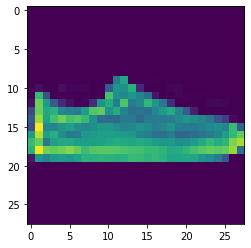

Decision Tree + PCA90 memprediksi bahwa ini adalah gambar Sandal
Seharusnya, ini adalah gambar Sneaker
-------------------
-------------------
Gambar untuk index: 21


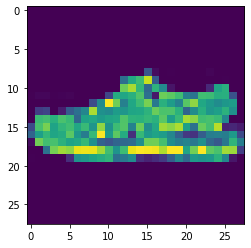

Decision Tree + PCA90 memprediksi bahwa ini adalah gambar Sneaker
Seharusnya, ini adalah gambar Sandal
-------------------
-------------------
Gambar untuk index: 23


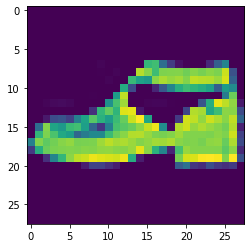

Decision Tree + PCA90 memprediksi bahwa ini adalah gambar Sandal
Seharusnya, ini adalah gambar Boots
-------------------
-------------------
Gambar untuk index: 25


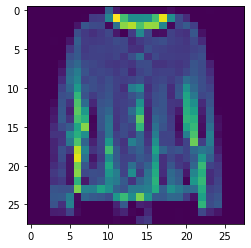

Decision Tree + PCA90 memprediksi bahwa ini adalah gambar Shirt
Seharusnya, ini adalah gambar Coat
-------------------
-------------------
Gambar untuk index: 28


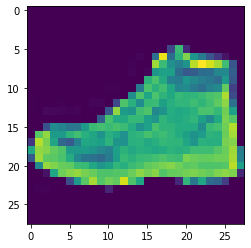

Decision Tree + PCA90 memprediksi bahwa ini adalah gambar Sneaker
Seharusnya, ini adalah gambar Boots
-------------------


In [50]:
wrong_index = [12,21,23,25,28]
for i in wrong_index:
  explain(i)

Dapat dilihat bahwa model cenderung sulit membedakan jenis-jenis alas kaki, yaitu sneaker, sandal, dan boots.